In [1]:
import keras
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt


In [2]:
# 一些参数
batch_size = 128
epochs = 20
num_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)   # 输入数据形状

In [3]:
# 获取数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 归一化
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 改变数据形状，格式为(n_samples, rows, cols, channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [4]:
# 控制台打印输出样本数量信息
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 样本标签转化为one-hot编码格式
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [5]:
# 创建CNN模型
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# 这一层的输入为第一层的输出，是一个28*28*6的节点矩阵。
# 本层采用的过滤器大小为2*2，长和宽的步长均为2，所以本层的输出矩阵大小为14*14*6。
model.add(MaxPooling2D(pool_size=(2, 2)))

# 本层的输入矩阵大小为14*14*6，使用的过滤器大小为5*5，深度为16.本层不使用全0填充，步长为1。
# 本层的输出矩阵大小为10*10*16。本层有5*5*6*16+16=2416个参数
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

# 本层的输入矩阵大小10*10*16。本层采用的过滤器大小为2*2，长和宽的步长均为2，所以本层的输出矩阵大小为5*5*16。
model.add(MaxPooling2D(pool_size=(2, 2)))

# 本层的输入矩阵大小为5*5*16，在LeNet-5论文中将这一层称为卷积层，但是因为过滤器的大小就是5*5，#
# 所以和全连接层没有区别。如果将5*5*16矩阵中的节点拉成一个向量，那么这一层和全连接层就一样了。
# 本层的输出节点个数为120，总共有5*5*16*120+120=48120个参数。
model.add(Flatten())
model.add(Dense(120, activation='relu'))

# 本层的输入节点个数为120个，输出节点个数为84个，总共参数为120*84+84=10164个 (w + b)
model.add(Dense(84, activation='relu'))

# 本层的输入节点个数为84个，输出节点个数为10个，总共参数为84*10+10=850
model.add(Dense(10, activation='softmax'))
model.summary()     # 在控制台输出模型参数信息
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [6]:
# 训练模型
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 12s 23ms/step - loss: 0.3269 - accuracy: 0.9020 - val_loss: 0.1009 - val_accuracy: 0.9688
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1017 - accuracy: 0.9689 - val_loss: 0.0732 - val_accuracy: 0.9756
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0729 - accuracy: 0.9772 - val_loss: 0.0598 - val_accuracy: 0.9806
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0546 - val_accuracy: 0.9830
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0488 - accuracy: 0.9839 - val_loss: 0.0519 - val_accuracy: 0.9828
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0424 - val_accuracy: 0.9855
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0355 - accuracy: 0.9883 - val_loss: 0.0427 - val_accuracy:

In [7]:
# 预测
n = 5   # 给出需要预测的图片数量，为了方便，只取前5张图片
predicted_number = model.predict(x_test[:n], n)

1/1 [==============================] - 0s 137ms/step


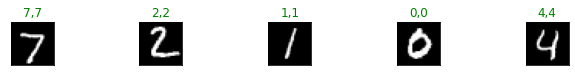

In [8]:
# 画图
plt.figure(figsize=(10, 3))
for i in range(n):
    plt.subplot(1, n, i + 1)
    t = x_test[i].reshape(28, 28)   # 向量需要reshape为矩阵
    plt.imshow(t, cmap='gray')      # 以灰度图显示
    plt.subplots_adjust(wspace=2)   # 调整子图间的间距，挨太紧了不好看
    # 第一个数字是真实标签，第二个数字是预测数值
    # 如果预测正确，绿色显示，否则红色显示
    # 预测结果是one-hot编码，需要转化为数字
    if y_test[i].argmax() == predicted_number[i].argmax():
        plt.title('%d,%d' % (y_test[i].argmax(), predicted_number[i].argmax()), color='green')
    else:
        plt.title('%d,%d' % (y_test[i].argmax(), predicted_number[i].argmax()), color='red')
    plt.xticks([])  # 取消x轴刻度
    plt.yticks([])
plt.show()

In [9]:
model.save("let5_mnist.hdf5")